In [1]:
import os
from os.path import join
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 

# Supersense categories 

In [2]:
texts = ['Emma', 
         'Northanger_Abbey',
         'Persuasion',
         'Mansfield_Park',
         #'Pride_and_Prejudice',
         'Sense_and_Sensibility']

In [3]:
all_categories = Counter()
tokens_novels = dict()

for text in texts:
    print(text)
    
    entities = pd.read_csv( join('Data',f'{text.lower()}.supersense') , sep = '\t')
    all_categories.update(entities['supersense_category'].tolist())

    tokens = pd.read_csv( join('Data',f'{text.lower()}.tokens') , sep = '\t')
    nr_tokens = tokens['token_ID_within_document'].iloc[-1]
    tokens_novels[text] = nr_tokens 

Emma
Northanger_Abbey


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Persuasion
Mansfield_Park
Sense_and_Sensibility


In [4]:
print('The novels contain the following categories:')
for category,count in all_categories.most_common():
    print( f"{category} ({count})")

The novels contain the following categories:
noun.person (29130)
verb.stative (21846)
verb.communication (15248)
verb.cognition (11364)
noun.communication (9304)
noun.cognition (8189)
noun.attribute (7509)
verb.social (6851)
noun.feeling (6534)
noun.act (6424)
noun.time (6326)
verb.motion (6193)
noun.artifact (5985)
verb.perception (5675)
noun.state (5630)
verb.emotion (5577)
verb.possession (5402)
verb.change (4509)
noun.location (4098)
noun.group (2554)
noun.quantity (2106)
verb.contact (2009)
noun.body (1823)
noun.event (1557)
verb.creation (1403)
verb.body (1064)
noun.possession (939)
noun.Tops (773)
verb.consumption (763)
noun.food (578)
noun.relation (578)
noun.object (559)
noun.phenomenon (487)
noun.substance (365)
noun.animal (332)
noun.motive (252)
noun.plant (220)
verb.competition (199)
noun.process (54)
verb.weather (44)
noun.shape (26)


In [5]:
def analyse_categories(query,label):

    rows = []

    for text in texts:
        row = []
        print(f'\n\n{text}', end = '\n\n')
        count_categories = Counter()
        data = pd.read_csv( join('Data',f'{text.lower()}.supersense') , sep = '\t')
        data_category = data.query( query )
        for word in data_category['text'].unique():
            print(word, end = '; ')
        row.extend( [text,data_category.shape[0],tokens_novels[text]] )  
        rows.append(row)
        
    
    df = pd.DataFrame( rows , columns = ['text','words_in_category','nr_tokens'] )
    df['percentage'] = df['words_in_category'] / df['nr_tokens']
    
    x_axis = 'text'
    y_axis = 'percentage'


    fig = plt.figure( figsize=( 10 , 5 ) )
    graph = sns.barplot( data=df , x=x_axis, y=y_axis, dodge=False , color = '#114496')
    graph.set_xlabel('Title' , size = 14) 
    graph.set_ylabel( label , size = 14 )

    plt.show()


def unique_words(query):
    for text in texts:
        print(f'\n\n{text}', end = '\n\n')
        count_categories = Counter()
        data = pd.read_csv( join('Data',f'{text.lower()}.supersense') , sep = '\t')
        data_category = data.query(query)
        words = list(data_category['text'].unique())
        words = [word.lower() for word in words]

        #print(words)


        for other_text in texts:
            if other_text != text:
                data_other = pd.read_csv( join('Data',f'{other_text.lower()}.supersense') , sep = '\t')
                data_other_category = data_other.query(query)
                for word in data_other_category['text'].unique():
                    if word.lower() in words:
                        #print(word)
                        words.remove(word.lower())

        print(words)

    

## Emotion



Emma

distress; vex; affection; temper; liked; enjoyments; sorrow; grief; cheer; satisfaction; wished; gratitude; concerns; pleasure; bear; loved; evil; friendliness; hating; compassion; feel; wish; pity; humours; like; comfort; regrets; catch cold; wanted; joy; feeling; hope; please; loves; faults; want; miss; amusement; blessed; deserves; shame; Invite; surprized; pride; offend; mortification; love; anger; relieved; care for; reluctance; felt; longed; wishes; shaken; excite; apprehension; caprice; concern; regret; missed; spirits; enjoyment; taken by; alleviation; teased; pains; horror; preferred; fancied; regard; liking; smiles; enjoyed; favour; frighten; hate; vanity; delighted; interest; dreaded; admired; struck; pushing; deference; impressed; feelings; welcomed; grieve; approbation; happiness; panic; intimacy; inviting; privileges; conceit; desiring; attachment; sentiment; satisfied; pleasures; comforts; encouraged; talkativeness; amused; enjoying; exultation; hospitality; disl

enjoy; preferred; pleasure; preferring; like; distaste; taste; hated; loved; love; caught; delight; wished; prefer; objection; feels; raptures; passion; excited; admiration; affectation; awkwardness; shyness; anxiety; oppress; heart; sadness; drown; relieve; entertained; wish; feelings; emotions; excite; wanted; fear; distress; jealousy; emotion; surprise; hoped; amazement; longed; felt; feel; disappointment; hope; consolation; comfort; admired; charms; wonder; vanity; humour; pleasantry; interested; astonishment; distressed; please; civilities; struck; feared; tease; inclination; satisfied; eagerness; cared; sentiment; despair; joy; contented; effusions; delighted; strike; surprised; powers; respect; gaiety; awe; affection; attachment; relief; sufferings; enjoyment; disappointed; indulged; liked; escaped; experienced; confidence; disgust; pride; indifference; shame; colouring; wants; pleased; lament; detest; detestation; satisfaction; challenging; embarrassment; engrossed; want; hate;

captivate; benefited; connexions; pride; wish; desire; feelings; contented; bitterness; cherish; resentment; wants; contrition; despondence; longed; concerns; wanting; benevolence; frightened; love; expecting; feel; hate; want; faults; sensations; reached; affection; surprise; distract; inconvenience; hope; fear; tease; depressing; regaled; welcome; disgust; taking; good humour; embarrassment; awe; company; shyness; indifference; longing; gratitude; comfort; sorrows; sulkiness; temper; hold; disheartened; awed; mortified; abashed; sunk; console; terror; pains; overcome; shame; sobs; grievance; wanted; distress; like; miss; goodwill; felt; delighted; delight; timidity; pain; fears; spirits; pleasures; merriment; enjoyment; satisfaction; pity; emulation; repressed; cares; attachment; ill; anxiety; uneasiness; good sense; complacency; mirth; conference; dispositions; interests; diffidence; consolation; apprehension; fondness; charmed; encouraged; loved; consoled; impress; sorrow; disappoi

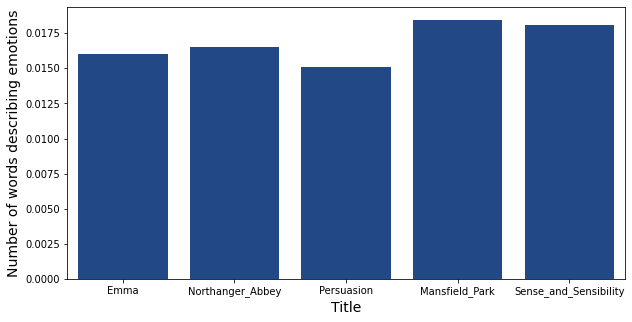

In [6]:
query = 'supersense_category == "verb.emotion" or supersense_category == "noun.feeling"'
label = 'Number of words describing emotions'

analyse_categories(query,label)

In [7]:
unique_words(query)



Emma

['cheer', 'humours', 'catch cold', 'deserves', 'surprized', 'care for', 'taken by', 'teased', 'pushing', 'deference', 'panic', 'inviting', 'privileges', 'talkativeness', 'hospitality', 'drawn in', 'engrosses', 'feels for', 'strikes', 'incommoding', 'disgraced', 'killed', 'offending', 'brace', 'cheering', 'solace', 'surprize', 'blinds', 'mischief', 'refinement', 'provoking', 'cast down', 'settled', 'inspiration', 'be.—now', 'anticipated', 'charade', 'temptations', 'anxious', 'forestalling', 'fidgetiness', 'charity', 'whim', 'envious', 'feel cold', 'invites', 'perplexities', 'oddities', 'whims', 'caprices', 'revived', 'constitution', 'recover', 'elevate', 'struggles', 'adoration', 'affronted', 'mind!—look down', 'civility.—but', 'stir out', 'resemble', 'repressing', 'chuses', 'overpower', 'seeing', 'intention', 'welcoming', 'prejudices', 'appease', 'fainted', 'occasioned', 'augur', 'approving', 'catching cold', 'commendation', 'wickedness', 'hurting', 'loves piquet', 'bewildered'

## Plants



Emma

shrubberies; shrubbery; flowers; tree; pollards; wheat; throat,—both; carrot; trunk; apple; trees; fruit; apples; laurels; flower; plants; olive; sweetbread; elms; spruce; trees;—and; wood;—and; orchard; blossom; clover; shrubs; 

Northanger_Abbey

rose; bush; flowers; trees; flower; trunk; thorns; coppice; oak; oaks; forests; cedar; chestnut; hyacinths; woody; fruit; fruits; pinery; plants; Scotch firs; pine; shrubberies; apple; shrub; orchard; 

Persuasion

leaf; blossoms; groves; shrubberies; flower; trees; vine; tree; plants; grass; leaves; hedges; nut; bough; hazel nut; holly; nettles; varieties; forest; orchards; fruit; shrubbery; 

Mansfield_Park

gooseberry; flowers; shrubbery; plants; apricot; tree; fruit; trees; flower; grass; shrubs; foliage; roses; harvest; planted; larch; laurel; beech; oak; heath; leaves; Tintern; geraniums; branches; evergreens; laurels; evergreen; leaf; myrtle; yew; elegancies; 

Sense_and_Sensibility

trees!—but; leaf; branch; honeysuckles; lea

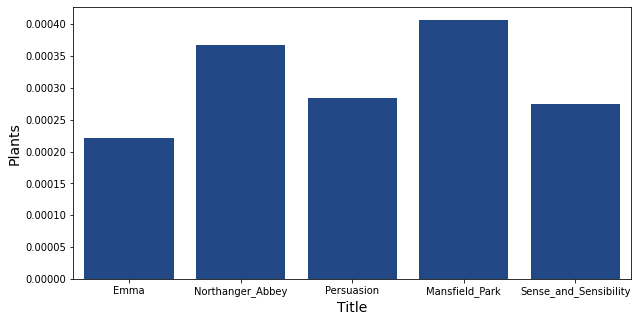

In [8]:
query = 'supersense_category == "noun.plant"'
label = 'Plants'

analyse_categories(query,label)

In [9]:
unique_words(query)



Emma

['pollards', 'wheat', 'throat,—both', 'carrot', 'apples', 'olive', 'sweetbread', 'elms', 'spruce', 'trees;—and', 'wood;—and', 'blossom', 'clover']


Northanger_Abbey

['rose', 'bush', 'coppice', 'oaks', 'forests', 'cedar', 'chestnut', 'hyacinths', 'woody', 'fruits', 'pinery', 'scotch firs', 'pine', 'shrub']


Persuasion

['groves', 'vine', 'hedges', 'nut', 'bough', 'hazel nut', 'holly', 'varieties', 'forest', 'orchards']


Mansfield_Park

['gooseberry', 'foliage', 'roses', 'harvest', 'planted', 'larch', 'laurel', 'beech', 'tintern', 'geraniums', 'branches', 'evergreens', 'evergreen', 'myrtle', 'elegancies']


Sense_and_Sensibility

['trees!—but', 'branch', 'honeysuckles', 'dead leaves', 'plantations', 'moss', 'thistles', 'sweetmeats', 'mulberry tree', 'whither', 'mulberry - tree', 'walnut trees', 'bloom', 'fir', 'ash', 'acacia', 'poplars']


## Animals



Emma

horses; eggs; egg; cows; cow; goose; horseback; cockade; horse; mermaid; shark; sharks; boot; porker; hind; human being; sheep; mule; puppies; whist; queen; pigeon; lamb; donkeys; hautboys; mare; fish; hazle; human; cattle; ox; dog; poultry; 

Northanger_Abbey

cricket; dormouse; canary; bird; hens; chickens; balls; horseback; beetle; giant; feathers; skeleton; horse; horses; animal; dogs; terriers; birds; fox -; hounds; necks; mull; hunter; cattle; human creature; domestic; human being; fowl; game; Newfoundland; puppy; puppies; 

Persuasion

crow; horses; human creature; horse; dogs; foot; sheep; dog; nuts; weasel; sparrows; dab; chick; rat; 

Mansfield_Park

mite; pug; horse; pony; horses; mare; poultry; horseback; animal; cattle; pheasants; fly; feet; starling; cows; eggs; creatures; hen; green goose; green geese; dogs; crowsfoot; pheasant; animals; turkey; goose; leg; ducks; hunters; mules; hunter; fox; human being; fan; egg; human beings; litter; puppy; human; human creatu

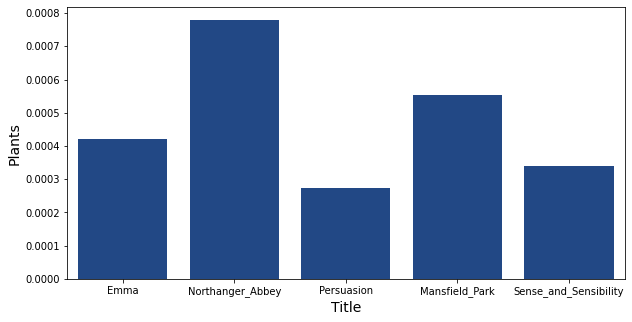

In [10]:
query = 'supersense_category == "noun.animal"'
label = 'Plants'

analyse_categories(query,label)

In [11]:
unique_words(query)



Emma

['cow', 'cockade', 'mermaid', 'shark', 'sharks', 'boot', 'porker', 'hind', 'mule', 'whist', 'queen', 'pigeon', 'lamb', 'donkeys', 'hautboys', 'hazle', 'ox']


Northanger_Abbey

['cricket', 'dormouse', 'canary', 'bird', 'chickens', 'balls', 'beetle', 'giant', 'feathers', 'skeleton', 'terriers', 'birds', 'fox -', 'hounds', 'necks', 'mull', 'domestic', 'fowl', 'newfoundland']


Persuasion

['crow', 'foot', 'nuts', 'weasel', 'sparrows', 'dab', 'chick', 'rat']


Mansfield_Park

['mite', 'pug', 'pony', 'pheasants', 'fly', 'feet', 'starling', 'creatures', 'hen', 'green goose', 'green geese', 'crowsfoot', 'pheasant', 'animals', 'turkey', 'leg', 'ducks', 'hunters', 'mules', 'fan', 'litter', 'human creatures']


Sense_and_Sensibility

['mosquitoes', 'mohrs', 'palanquins', 'brown', 'monkey', 'bee', 'beasts', 'cats', 'dairy']


## Cognition



Emma

remembrance; esteeming; judgment; disposition; think; rank; thought; left; think of; considering; recalled; powers; recollection; knowing; scheme; find fault; habits; mind; heart; acquaintance; wish for; kind; suppose; thoughts; thought of; know; doubt; opinion; observe; ideas; hoped; connexions; found; sort; business; regard; believe; idea; knew; knows; hear; felt; thinks for; divided; forgotten; matter; proved; things; manner; believed; made up my mind; understand; known; depend; talent; matters; comprehend; thinks of; understanding; look about; leave; connexion; thing; will; regrets; considered; kindred; considerations; concern; realised; schemes; probability; proof; choose; chosen; assume; imagine; curiosity; attention; understood; included; heard; formed; sense; source; bear; subject; regarded as; bias; inclination; taken; comprehended; cleverness; communications; principles; systems; accomplishments; reckoned; wonder; feel; anticipated; form; opinions; conviction; self; u

faculties; contemplating; affairs; turned over; read; interest; think; considered; respect; judgement; pardoned; attach; life; relied; principles; instruction; anticipated; acquaintance; thought; mind; understanding; reading; equality; forgetting; deemed; see; self - possession; idea; law; remembrance; consciousness; felt; presented; left; known; study; found; plan; expected; marked out; regarded; thinking of; suppose; sentiments; habits; talents; knew; thoughts; method; occur; set; whole; expect; views; consideration; sense; ideas; notions; prejudices; side; doubt; plans; economy; thought of; influenced; marking out; scheme; principle; hope; decided; self - denial; believed; requisitions; decencies; taken up; character; judge; looked up; choose; indecision; alternatives; inclination; fixed on; thought more; believe; prejudice; borne; intention; burden; understood; art; attention; point; arrangements; experience; confidence; estimate; observe; choice; presume; methods; take; contemplat

acquaintance; thought; education; choice; interest; principle; method; thinking; matter; satisfied; comprehended; reflections; hearing; connexion; dispose; bewailing; felt; think of; compared; think; thought of; comprehend; notions; piece; know; thinking of; things; knew; idea; truth; throw; impediment; plan; meant; consider; understand; regard; bear; heart; matters; settled; considered; pleasures; scheme; resolved; intention; love; fancied; kind; views; inquiry; heard; considering; considerations; suppose; expect; wait; see; ignorance; opinions; trust; learn; leave; difficulty; distinction; minds; consciousness; remember; expectations; point; choose; line of conduct; believed; trusting; seeing; part; confidence; take; supposed; sight; depend upon; wish; reconcile; understood; finding; learned; perceived; wondered; astonished; expected; left; suspicion; surprised; puzzled; pursuing; found; thoughts; ruled; attention; sensibility; view; catch; schemes; inquired; endure; sort; feels; dec

good opinion; intended; attention; interest; heart; read; whole; attractions; known; meditated; thought; feel; thought of; intention; mind; sense; kind; reflect on; understanding; judgment; knew; learn; abilities; sensibility; gave; resolved; law; plan; reminded; expectation; fancy; think; related; considered as; supposed; know; left; suppose; Consider; expect; knowing; think of; expectations; business; trouble; found; restriction; expected; believe; style of living; idea; consider; mean; understand; consideration; intentions; hear; answered; notions; rejected; part; reflections; assurance; doubted; believing; relied on; liberality; acquaintance; occurred; opinions; will; doctrine; acknowledged; comprehension; opinion; wishes; saw; reflection; esteem; comprehended; regard; ideas; considered; looked forward; settled; world; attach; intelligence; taste; admires; knows; matter; characters; reading; convinced; Remember; learning; distrusts; matters; give; honoured; estimating; inclinations

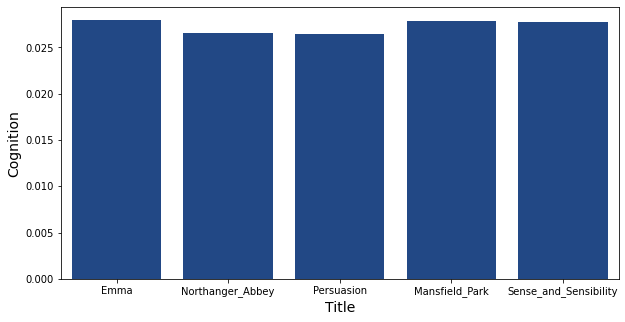

In [12]:
query = 'supersense_category == "verb.cognition" or supersense_category == "noun.cognition"'
label = 'Cognition'

analyse_categories(query,label)

In [13]:
unique_words(query)



Emma

['disposition', 'find fault', 'thinks for', 'divided', 'look about', 'kindred', 'assume', 'shaken hands', 'inclination for', 'appreciating', 'wonders', 'specimens', 'likes', 'copied', 'copying', 'made out', 'refresh', 'features', 'following up', 'proportions', 'hesitate', 'hesitating', 'surmised', 'crossed', 'estimated', 'delights', 'bewitches', 'satisfies', 'pick', 'puff', 'catch at', 'allowance', 'written out', 'intellects', 'looking at', 'pondered', 'courts', 'souls', 'take after', 'exteriors', 'occupations', 'interests', 'schemed', 'passed over', 'sense of', 'renewing', 'declined', 'point of law', 'entered into', 'doctoring', 'rumination', 'turn to', 'attributing', 'conceptions', 'vision', 'me!—what', 'deem', 'gratifications', 'lay down', 'know?—had', 'assuming', 'interpret', 'error', 'dangers', 'misinterpreted', 'cogitation', 'set about', 'use!—nobody', 'following', 'turn', 'prefers', 'agrees', 'engrafted', 'took notice', 'culture', 'powers of mind', 'examination', 'took i

['good opinion', 'attractions', 'gave', 'restriction', 'style of living', 'doctrine', 'admires', 'distrusts', 'give', 'esteem', 'preference', 'concealed', 'suffer', 'place inquiry', 'recurred', 'screened', 'point of view', 'esteems', 'played', 'diverted', 'objection', 'feel for', 'self -', 'person', 'idolized', 'acquiesced', 'drawn off', 'annexed', 'dropped', 'speaks', 'remembers', 'imperfections', 'marking', 'contrives', 'objections', 'attachment', 'minutiae', 'refinements', 'intends', 'draw on', 'recover', 'enquire', 'filled', 'thought over', 'determination', 'disposed of', 'sentiment', 'make up', 'prescience', 'partook', 'backwardness', 'look out for', 'inadvertence', 'attribute', 'uniformly', 'screen', 'carrying', 'reminded of', 'originated', 'inspiring', 'pretends', 'defined', 'temporizing', 'yield,—when', 'engage', 'pronounced', 'engross', 'expects', 'declares', 'gathered', 'brought forward', 'inquisitiveness', 'pretend', 'mental', 'disbelief', 'divine', 'incredulity', 'detecting

## Phenomenon



Emma

change; moonlight; rain; weather; effect; result; consequence; effects; consequences; Weather; wind; storm; snow; thing; fortune; attraction; candlelight; bad weather; sun; smoke; heat; light; cloud; 

Northanger_Abbey

effect; fortune; weather; result; consequence; rain; sunshine; gust; wind; consequences; embers; rays; storm; breeze; tempest; light; fading light; bad weather; 

Persuasion

consequence; weather; effect; connexions; results; foul weather; gale; effects; breeze; wind; rain; result; winds; consequences; sun; fortune; sunshine; 

Mansfield_Park

result; consequences; effects; consequence; effect; weather; hay; moonlight; air; heat; wind; sun; mist; breeze; candlelight; current; snow; rain; gust; strain; connexions; winds; connexion; commission; attraction; light; good luck; rays; sunshine; blaze; change; 

Sense_and_Sensibility

effects; result; effect; weather; nature; sunshine; rain; cloud; wind; fair weather; consequence; candlelight; frost; sun; death; consequ

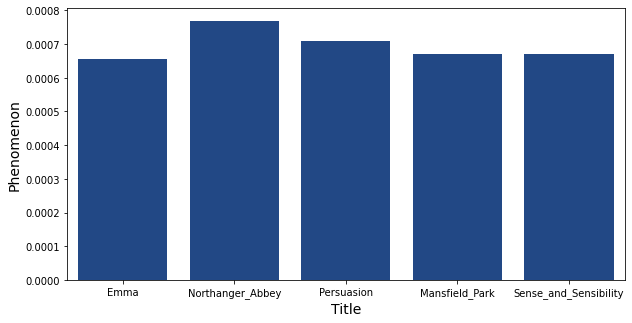

In [14]:
query = 'supersense_category == "noun.phenomenon"'
label = 'Phenomenon'

analyse_categories(query,label)

In [15]:
unique_words(query)



Emma

['thing', 'smoke']


Northanger_Abbey

['embers', 'tempest', 'fading light']


Persuasion

['results', 'foul weather', 'gale']


Mansfield_Park

['hay', 'air', 'mist', 'current', 'strain', 'connexion', 'commission', 'good luck', 'blaze']


Sense_and_Sensibility

['nature', 'fair weather', 'frost', 'death', 'chance']


In [16]:
query = 'supersense_category == "verb.communication" or supersense_category == "noun.communication"'
unique_words(query)



Emma

['caresses', 'wife;—and', 'curtseys', 'asks', 'animated', 'find fault', 'smoothed', 'embodied', 'dissuaded', 'fetched', 'quadrille', 'prosings', 'book”—was', 'ingratiating', 'equalled', 'surprize', 'drew up', 'outcry', 'naïveté', 'likenesses', 'provoked', 'forswear', 'destined', 'stationing', 'gaze', 'memorial', 'allow for', 'drawings', 'commissions', 'assurances,—and', 'parcel', 'grammatical errors', 'doubts', 'demurs', 'wording', 'tattle', 'giggle', 'answer!—nothing', 'answer!—you', 'abusing', 'restoratives', 'pleading', 'appearances', 'riddles', 'ciphers', 'putting in', 'riddle', 'contribute', 'enigmas', 'conundrums', 'puzzles', 'recited', 'charade', 'transcribed', 'pomp', 'beam', 'break off', 'courtship', 'compliment!—and', 'spoke for', 'embraces', 'prologue', 'passage', 'texts', 'preached', 'couplet', 'writing down', 'declaration of', 'refine', 'affix', 'affixed', 'stanza', 'christened', 'lay down', 'passing off', 'hesitating', 'parade', 'inducements', 'speaking with', 'di

['disoblige', 'bestowed', 'preclude', 'imploring', 'unqualified', 'debated', 'etc.;—but', 'moment', 'condescensions', 'prognostications', 'acquitting', 'adjourned', 'admonitions', 'material', 'frank', 'orthography', 'dates', 'disposition', 'gave up', 'alterations', 'novelties', 'driven', 'pop off', 'qualifications', 'force', 'prophesy', 'trouble', 'invective', 'aiming', 'charged', 'breaking', 'remedied', 'evincing', 'entitled', 'bringing', 'superintending', 'coax', 'straws', 'transactions', 'turns to', 'stamp', 'supplying', 'haunch', 'burlesque', 'get out', 'imposed on', 'pretending', 'insinuating', 'turning', 'nuisances', 'speak for', 'coming down', 'confides', 'relate', 'envying', 'speaks of', 'appreciated', 'praising', 'cutting', 'did', 'bordering', 'value', 'collation', 'inscriptions', 'banners', 'commanding', 'gradations', 'foregoing', 'influencing', 'repartee', 'striking', 'salutations', 'chit', 'vented', 'joking', 'reasons', 'wishing away', 'apostrophe', 'preaches', 'sermons', '